In [6]:
import numpy as np
import torch
import os

In [103]:
loaded_params = {}
exp_path = '../logging/2s-3s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None'
all_files = os.listdir(exp_path)
all_files = sorted(all_files)

all_mae = []
all_mae_vs_random_init = []
all_time = []
# List all files in the given directory
for filename in all_files:
    # Check if the filename matches the pattern of sampleidx files
    if filename.startswith("sampleidx_") and filename.endswith("_x_param_last.pt"):
        # Extract the sample index from the filename
        sample_index = int(filename.split('_')[1])
        
        # Construct the full file path
        file_path = os.path.join(exp_path, filename)
        
        if os.path.isfile(file_path):
            checkpoint = torch.load(file_path)
            
            # check point is dictonary with keys 'x_param', 'time', 'inputs', 'targets', 'transcript' 
            # now printe transcript
            # print(checkpoint['transcript'])
            x_param = checkpoint['x_param']
            inputs = checkpoint['inputs'] 

            x_init = torch.rand_like(inputs) * 2 - 1

            mae = torch.mean(torch.abs(x_param - inputs))
            mae_vs_random_init = torch.mean(torch.abs(inputs - x_init))

            all_mae.append(mae.item())
            all_time.append(checkpoint['time'])
            all_mae_vs_random_init.append(mae_vs_random_init.item())
            # print(f'MAE: {mae.item()}')
        else:
            print(f'File {file_path} does not exist.')

print('mae vs random init mean, std:', np.mean(all_mae_vs_random_init), np.std(all_mae_vs_random_init))
print('mae mean, std:', np.mean(all_mae), np.std(all_mae))  # print mean and std of mae
print('time mean, std:', np.mean(all_time), np.std(all_time))  # print mean and std of time
print('number of samples:', len(all_mae))  # print number of samples


mae vs random init mean, std: 8.297037239074706 0.8507798983021081
mae mean, std: 6.75746244430542 0.82478223459077
time mean, std: 759.5187305617333 58.56709979035763
number of samples: 100


/tmp/ipykernel_1587643/562123344.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(file_path)


In [104]:
checkpoint.keys()

dict_keys(['x_param', 'time', 'inputs', 'targets', 'transcript'])

In [62]:
img.shape[1]//2-30-30

690

In [63]:
img.shape[1]-50 - (20+img.shape[1]//2)

680

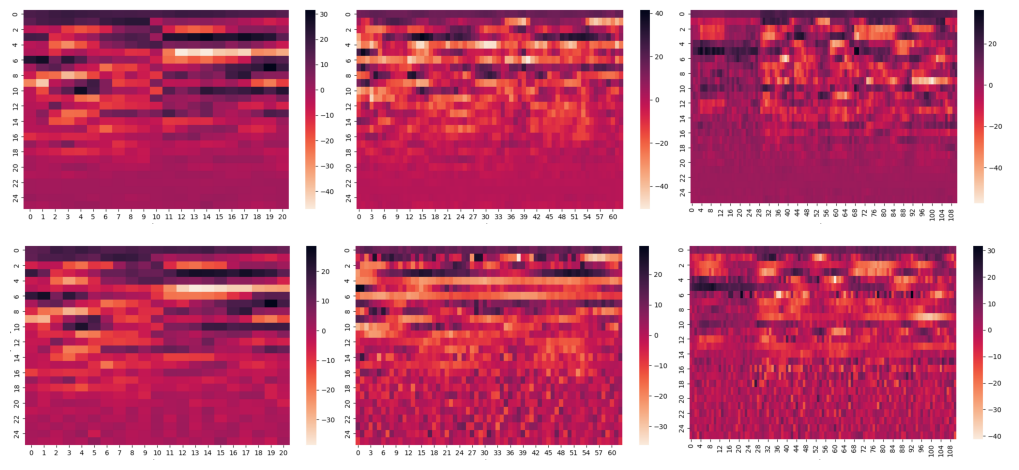

In [74]:
# load a figure 
import matplotlib.pyplot as plt

path_1 = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/0s-1s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None/figures/sampleidx_1_zeroorder2024-09-27-15-09_180.png'
path_2 = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None/figures/sampleidx_0_zeroorder2024-09-27-15-11_180.png'
path_3 = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/2s-3s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None/figures/sampleidx_0_zeroorder2024-09-27-15-16_180.png'
paths = [path_1, path_2, path_3]

# plot the images in the same figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i in range(3):
    path = paths[i]
    img = plt.imread(path)


    # cut the image in 4 parts and show the top left part depend on image size, plot image without axis

    target = img[35:img.shape[0]//2-20, 30:img.shape[1]//2-30]
    reconstruct = img[35:img.shape[0]//2-20, 20+img.shape[1]//2: img.shape[1]-40] 


# for i in range(3):
    axes[0, i].imshow(target)
    axes[1, i].imshow(reconstruct)
    axes[0, i].axis('off')  # Turn off axis
    axes[1, i].axis('off')  # Turn off axis

plt.tight_layout(pad=0)
# plt.subplots_adjust(wspace=--1, hspace=0.0)

In [98]:
path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None/figures/sampleidx_0_firstorder2024-09-27-15-03_100.png'
img = plt.imread(path)


# cut the image in 4 parts and show the top left part depend on image size, plot image without axis

target = img[35:img.shape[0]//2-20, 30:img.shape[1]//2-30]
reconstruct = img[35:img.shape[0]//2-20, 20+img.shape[1]//2: img.shape[1]-40] 



(-0.5, 554.5, 394.5, -0.5)

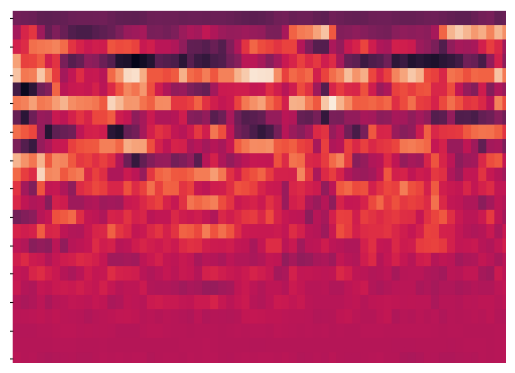

In [100]:
plt.imshow(target[:target.shape[0]-50, 25:target.shape[1]-110])
plt.axis('off')  # Turn off axis

(-0.5, 554.5, 394.5, -0.5)

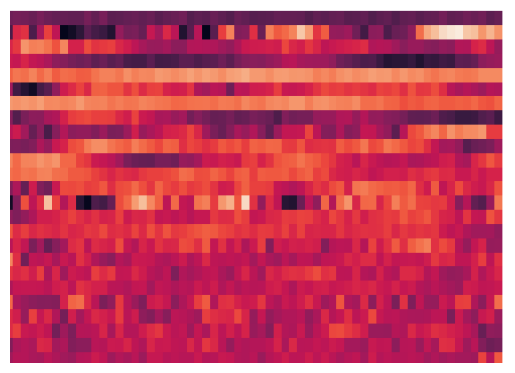

In [101]:
plt.imshow(reconstruct[:reconstruct.shape[0]-50, 25:reconstruct.shape[1]-110])
plt.axis('off')  # Turn off axis

### learning rate experiment

In [16]:
loaded_params = {}
import os
def run_exp(exp_path):
    all_files = os.listdir(exp_path)
    all_files = sorted(all_files)

    all_mae = []
    all_mae_vs_random_init = []
    all_time = []
    # List all files in the given directory
    for filename in all_files:
        # Check if the filename matches the pattern of sampleidx files
        if filename.startswith("sampleidx_") and filename.endswith("_x_param_last.pt"):
            # Extract the sample index from the filename
            sample_index = int(filename.split('_')[1])
            
            # Construct the full file path
            file_path = os.path.join(exp_path, filename)
            
            if os.path.isfile(file_path):
                checkpoint = torch.load(file_path)
                
                # check point is dictonary with keys 'x_param', 'time', 'inputs', 'targets', 'transcript' 
                # now printe transcript
                # print(checkpoint['transcript'])
                x_param = checkpoint['x_param']
                inputs = checkpoint['inputs'] 

                x_init = torch.rand_like(inputs) * 2 - 1

                mae = torch.mean(torch.abs(x_param - inputs))
                mae_vs_random_init = torch.mean(torch.abs(inputs - x_init))

                all_mae.append(mae.item())
                all_time.append(checkpoint['time'])
                all_mae_vs_random_init.append(mae_vs_random_init.item())
                # print(f'MAE: {mae.item()}')
            else:
                print(f'File {file_path} does not exist.')

    print('mae vs random init mean, std: {:.2f} \pm {:.2f}'.format(np.mean(all_mae_vs_random_init), np.std(all_mae_vs_random_init)))
    print('mae mean, std: {:.2f} \pm {:.2f}'.format(np.mean(all_mae), np.std(all_mae)))  # print mean and std of mae
    print('time mean, std: {:.2f} \pm {:.2f}'.format(np.mean(all_time), np.std(all_time)))  # print mean and std of time
    print('number of samples:', len(all_mae))  # print number of samples

In [17]:
print('0.001')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.001_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None'
run_exp(exp_path)
print('*'*50)
print('0.01')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.01_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None'
run_exp(exp_path)
print('*'*50)
print('0.1')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.1_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None'
run_exp(exp_path)
print('*'*50)
print('0.5')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None'
run_exp(exp_path)
print('*'*50)
print('1.0')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_1.0_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None'
run_exp(exp_path)
print('*'*50)


0.001
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 10.04 \pm 1.16
time mean, std: 489.72 \pm 46.97
number of samples: 100
**************************************************
0.01
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 8.69 \pm 1.06
time mean, std: 487.23 \pm 47.58
number of samples: 100
**************************************************
0.1
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 7.91 \pm 1.11
time mean, std: 478.94 \pm 44.37
number of samples: 100
**************************************************
0.5
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 5.34 \pm 1.02
time mean, std: 442.56 \pm 122.31
number of samples: 100
**************************************************
1.0
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 4.77 \pm 0.97
time mean, std: 630.50 \pm 120.73
number of samples: 100
**************************************************


/tmp/ipykernel_1602274/3708339976.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(file_path)


### top grad percentage experiment

In [21]:
print('0.2')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_0.2_cpt_None'
run_exp(exp_path)
print('*'*50)

print('0.4')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_0.4_cpt_None'
run_exp(exp_path)
print('*'*50)

print('0.6')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_0.6_cpt_None'
run_exp(exp_path)
print('*'*50)

print('0.8')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_0.8_cpt_None'
run_exp(exp_path)
print('*'*50)

print('1.0')
exp_path = '/scratch/f006pq6/projects/asr-grad-reconstruction/logging/1s-2s/DS1_batchstart_0_batch_end_100_init_uniform_opt_Adam_lr_0.5_distfunc_cosine_reg_None_regw_0.0_top-grad-perc_1.0_cpt_None'
run_exp(exp_path)
print('*'*50)




0.2
mae vs random init mean, std: 8.60 \pm 0.99
mae mean, std: 7.23 \pm 1.12
time mean, std: 678.30 \pm 106.55
number of samples: 100
**************************************************
0.4
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 6.18 \pm 1.10
time mean, std: 677.96 \pm 112.39
number of samples: 100
**************************************************
0.6
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 5.79 \pm 0.96
time mean, std: 685.14 \pm 109.99
number of samples: 100
**************************************************
0.8
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 5.50 \pm 0.98
time mean, std: 610.77 \pm 85.99
number of samples: 100
**************************************************
1.0
mae vs random init mean, std: 8.61 \pm 0.99
mae mean, std: 5.34 \pm 1.02
time mean, std: 442.56 \pm 122.31
number of samples: 100
**************************************************


/tmp/ipykernel_1602274/3708339976.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(file_path)
